## Text Classification
In this assignment, your task is to train a ML model for text classification task.

Allowed libraries are basic python libraries, numpy, pandas, re, and scikit-learn.

In [62]:
import pandas as pd
import numpy as np
import re
import collections

# Q1
## Data Collection and Preprocessing

a) Download the 'tweeteval' emotion dataset from https://huggingface.co/datasets/tweet_eval/tree/main/dummy/emotion/1.1.0 and read the training corpus with $pandas$.

In [63]:
# code
df = pd.read_csv('dummy_data/train_text.txt', sep='\t', header=None)
df.columns = ['text']
df.head()

,text
0,“Worry is a down payment on a problem you may ...
1,My roommate: it's okay that we can't spell bec...
2,No but that's so cute. Atsu was probably shy a...
3,Rooneys fucking untouchable isn't he? Been fuc...
4,it's pretty depressing when u hit pan on ur fa...


b) Lowercase the text in the training courpus and then use Spacy to tokenize and lemmatize.

In [64]:

import spacy
nlp = spacy.load('en_core_web_sm')
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lambda x: [token.lemma_ for token in nlp(x)])
df.head()

,text
0,"["", worry, be, a, down, payment, on, a, proble..."
1,"[my, roommate, :, it, be, okay, that, we, can,..."
2,"[no, but, that, be, so, cute, ., atsu, be, pro..."
3,"[rooney, fuck, untouchable, be, not, he, ?, be..."
4,"[it, be, pretty, depressing, when, u, hit, pan..."


c) Build a vocabulary after removing (i) stop words, (ii) punctuation marks and symbols,  and (iii) the words with frequence 2 or less. To find the stop words, sort the words by their count in descending order and identify manually the words not related to "emotion". You can only use basic python and regular expression.

In [65]:
from nltk.corpus import stopwords

# remove punctuation marks and symbols using regex
df['text'] = df['text'].apply(lambda x: [re.sub(r'[^\w\s]','',word) for word in x])

# remove stop words
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: [token for token in x if token not in stop])

# remove words with frequency 2 or less
freq = pd.Series(' '.join(df['text'].astype(str)).split()).value_counts()
freq = freq[freq <= 2]
df['text'] = df['text'].apply(lambda x: [token for token in x if token not in freq])


# remove empty strings
df['text'] = df['text'].apply(lambda x: [token for token in x if token != ''])

# sort the words by their count in descending order
freq = pd.Series(' '.join(df['text'].astype(str)).split()).value_counts()
freq = freq.sort_values(ascending=False)
freq

# build the vocabulary
vocab = freq.index.tolist()
vocab



# save the vocabulary
with open('vocab.txt', 'w') as f:
    for item in vocab:
        f.write("%s " % item)


        

d) Consider words in the vocabulary as features and convert each sample/text to a bag or word represetnation. This will be your training dataset.

In [66]:
with open('vocab.txt', 'r') as f:
    vocab = f.read().split()

# convert each sample/text to a bag or word represetnation
def convert_to_bow(text):
    bow = np.zeros(len(vocab))
    for word in text:
        if word in vocab:
            bow[vocab.index(word)] += 1
    return bow

df['text'] = df['text'].apply(lambda x: convert_to_bow(x))
df.head()


,text
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


e) Repeat steps (a), (b), and (d) for test corpus to obtain the test dataset.

In [67]:

df_test = pd.read_csv('dummy_data/test_text.txt', sep='\t', header=None)
df_test.columns = ['text']

# lowercase the text in the training courpus and then use Spacy to tokenize and lemmatize
df_test['text'] = df_test['text'].str.lower()
df_test['text'] = df_test['text'].apply(lambda x: [token.lemma_ for token in nlp(x)])

# remove punctuation marks and symbols using regex
df_test['text'] = df_test['text'].apply(lambda x: [re.sub(r'[^\w\s]','',word) for word in x])

# remove stop words
stop = stopwords.words('english')
df_test['text'] = df_test['text'].apply(lambda x: [token for token in x if token not in stop])

# remove words with frequency 2 or less
freq = pd.Series(' '.join(df_test['text'].astype(str)).split()).value_counts()
freq = freq[freq <= 2]
df_test['text'] = df_test['text'].apply(lambda x: [token for token in x if token not in freq])

# remove empty strings
df_test['text'] = df_test['text'].apply(lambda x: [token for token in x if token != ''])

# sort the words by their count in descending order
freq = pd.Series(' '.join(df_test['text'].astype(str)).split()).value_counts()
freq = freq.sort_values(ascending=False)

# build the vocabulary
vocab = freq.index.tolist()
vocab


["'feel',",
 "['user',",
 "'mpsvt',",
 "'open',",
 "'depression']",
 "'welcome',",
 "'joyful']",
 "'20yrs',",
 "'still']",
 "'government',",
 "'trauma',",
 "'hospital',",
 "['deppression',",
 "'choice',",
 "'people',",
 "'image',",
 "'brother',",
 "'add',",
 "'grateful',",
 "'relationship']",
 "'bad']",
 "['make',",
 "'accident',",
 "'anxiety',",
 "'fund',",
 "'ampmake',",
 "'w',",
 "'depth',",
 "'care',",
 "'dead',",
 "['visit',",
 "'terrorism',",
 "'ago',",
 "'confirm',",
 "'affect',",
 "'trigger',",
 "'door',",
 "'delighted',",
 "'partner',",
 "'understand',",
 "'symptom',",
 "'truly',",
 "'real',",
 "'depress',",
 "'word',",
 "'interesting',",
 "'bit',"]

# Q2 
## Training

Train a support vector maching with RBF kernel.

2a) Do 3-fold cross-validation to pick the optimum $gamma$ hyperparameter in RBF kernel in $sklearn.svm.SVC$.code
(https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Use "micro-averaged" f1-score for test score. 

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html for an example.

In [68]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# read the training labels
df_label = pd.read_csv('dummy_data/train_labels.txt', sep='\t', header=None)
df_label.columns = ['label']

# combine the training data and labels
df = pd.concat([df, df_label], axis=1)
df.head()

# split the training data into 3 folds for cross-validation using n_splits=3
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)
kf.get_n_splits(df)

# pick the optimum gamma hyperparameter in RBF kernel
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kf, scoring='f1_micro')
grid.fit(df['text'].tolist(), df['label'].tolist())

# print the best parameters
print("Best parameters: {}".format(grid.best_params_))


Best parameters: {'gamma': 0.001}


b) Plot test score vs gamma. Discuss the gamma values for which the model is underfit and overfit.

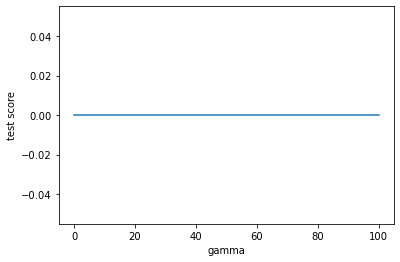

In [69]:
# code

import matplotlib.pyplot as plt
import numpy as np

# plot test score vs gamma
plt.plot(param_grid['gamma'], grid.cv_results_['mean_test_score'])
plt.xlabel('gamma')
plt.ylabel('test score')
plt.show()


c) use the best hyperparameter selected in (a) to  train on the entier dataset.

In [70]:
# code

from sklearn.svm import SVC

# train on the entier dataset
clf = SVC(kernel='rbf', gamma=0.001)
clf.fit(df['text'].tolist(), df['label'].tolist())

SVC(gamma=0.001)

# Q3 
## Evaluation

a) Find the confusion matrix and discuss your observations. Use *sklearn.metrics.confusion_matrix*.

In [71]:
# a) Find the confusion matrix and discuss your observations. Use *sklearn.metrics.confusion_matrix*.

# code

from sklearn.metrics import confusion_matrix

# bag of words representation of the test data using the vocabulary from the training data
df_test['text'] = df_test['text'].apply(lambda x: convert_to_bow(x))

# fix length of the test data to match your training data
for i in range(len(df_test)):
    if len(df_test['text'][i]) < len(df['text'][0]):
        df_test['text'][i] = np.append(df_test['text'][i], np.zeros(len(df['text'][0]) - len(df_test['text'][i])))
    elif len(df_test['text'][i]) > len(df['text'][0]):
        df_test['text'][i] = df_test['text'][i][:len(df['text'][0])]

# predict the labels for the test data
y_pred = clf.predict(df_test['text'].tolist())



b) Calculate micro-averaged and macro-averaged precision, recall, and F1 score. See the documentation for *sklearn.metrics.f1_score*, *sklearn.metrics.precision_score*, and *sklearn.metrics.recall_score*.

In [72]:
# Calculate micro-averaged and macro-averaged precision, recall, and F1 score. See the documentation for *sklearn.metrics.f1_score*, *sklearn.metrics.precision_score*, and *sklearn.metrics.recall_score*.

# code

from sklearn.metrics import f1_score, precision_score, recall_score

# print the micro-averaged precision, recall, and F1 score
print('Micro-averaged precision: {:.2f}'.format(precision_score(df_label['label'].tolist(), y_pred, average='micro')))
print('Micro-averaged recall: {:.2f}'.format(recall_score(df_label['label'].tolist(), y_pred, average='micro')))
print('Micro-averaged F1 score: {:.2f}'.format(f1_score(df_label['label'].tolist(), y_pred, average='micro')))
print('')


Micro-averaged precision: 0.40
Micro-averaged recall: 0.40
Micro-averaged F1 score: 0.40



c) Calculate overall accuracy

In [73]:
# overal precision, recall, and F1 score
print('Macro-averaged precision: {:.2f}'.format(precision_score(df_label['label'].tolist(), y_pred, average='macro')))
print('Macro-averaged recall: {:.2f}'.format(recall_score(df_label['label'].tolist(), y_pred, average='macro')))
print('Macro-averaged F1 score: {:.2f}'.format(f1_score(df_label['label'].tolist(), y_pred, average='macro')))

Macro-averaged precision: 0.10
Macro-averaged recall: 0.25
Macro-averaged F1 score: 0.14


/home/retech/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
